# Exploring travel trends on the Transport for London network cycling data🚉

## Concatenation de toutes les dataframes

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Automne 2022

In [13]:

dfs = []
c = 0
for f in os.listdir('data/automne'):
    if f.endswith('.csv'):
        # Construire le chemin complet du fichier CSV
        chemin_fichier = os.path.join('data/automne', f)
        
        dtype = {"Start date"}
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(chemin_fichier)
        
        # Vérifier si les noms de colonnes correspondent à la liste attendue
        noms_colonnes_attendus = ["Number", "Start date", "Start station number", "Start station", "End date",
                                   "End station number", "End station", "Bike number", "Bike model", 
                                   "Total duration", "Total duration (ms)"]
        if sorted(df.columns) == sorted(noms_colonnes_attendus):
            #c += 1
            # Renommer et réorganiser les colonnes
            df = df[["Number","Total duration (ms)","Bike number","End date","End station number","End station", "Start date","Start station number","Start station"]]
            df = df.rename(columns={"Number": "Rental Id",
                                    "Total duration (ms)": "Duration",
                                    "Bike number": "Bike Id",
                                    "End station number": "EndStation Id",
                                    "Start station number": "StartStation Id",
                                    "End station": "EndStation Name",
                                    "Start station": "StartStation Name",
                                    "End date":"End Date",
                                    "Start date":"Start Date"})
            print(df.head(5))
            
        dfs.append(df)

   Rental Id  Duration  Bike Id          End Date EndStation Id  \
0  125230172   7934133    54170  2022-09-19 02:11        200222   
1  125230173    736233    50087  2022-09-19 00:11        001194   
2  125230174    929662    54561  2022-09-19 00:14        300019   
3  125230175   1411818    54324  2022-09-19 00:23        300252   
4  125230176   1400619    22065  2022-09-19 00:23        300252   

                      EndStation Name        Start Date StartStation Id  \
0        Danvers Street, West Chelsea  2022-09-18 23:59          001059   
1  Westminster University, Marylebone  2022-09-18 23:59          002660   
2                Felsham Road, Putney  2022-09-18 23:59          001183   
3   Canada Water Station, Rotherhithe  2022-09-18 23:59          010624   
4   Canada Water Station, Rotherhithe  2022-09-18 23:59          010624   

               StartStation Name  
0    Albert Embankment, Vauxhall  
1             Frith Street, Soho  
2  Bramham Gardens, Earl's Court  
3     

C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\3964603046.py:10: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier)


   Rental Id  Duration  Bike Id          End Date EndStation Id  \
0  126426832   2115191    21213  2022-10-31 00:34          1071   
1  126426833   2460594    53221  2022-10-31 00:40          1071   
2  126426834   2111511    58076  2022-10-31 00:35          1071   
3  126426830    351950    30258  2022-10-31 00:03        200213   
4  126426831   2162434    16724  2022-10-31 00:35          1071   

                EndStation Name        Start Date StartStation Id  \
0         Tower Gardens , Tower  2022-10-30 23:59            1029   
1         Tower Gardens , Tower  2022-10-30 23:59            1029   
2         Tower Gardens , Tower  2022-10-31 00:00            1029   
3  Durant Street, Bethnal Green  2022-10-30 23:58            1083   
4         Tower Gardens , Tower  2022-10-30 23:59            1029   

               StartStation Name  
0        Windsor Terrace, Hoxton  
1        Windsor Terrace, Hoxton  
2        Windsor Terrace, Hoxton  
3  Commercial Street, Shoreditch  
4      

In [14]:
df_automne_concat = pd.concat(dfs, ignore_index=True)

# Enregistrer les données avec les dates dans un format unique dans un nouveau fichier CSV
#df_automne_concat.to_csv('data/automne/donnees_automne_concatenees.csv', index=False)

In [15]:

# Définir les formats de date à essayer
df_automne_concat['Start Date'] = df_automne_concat['Start Date'].str.replace(r'^(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2})$', r'\3/\2/\1 \4:\5', regex=True)
df_automne_concat['End Date'] = df_automne_concat['End Date'].str.replace(r'^(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2})$', r'\3/\2/\1 \4:\5', regex=True)
date_formats = ['%Y-%m-%d %H:%M', '%d/%m/%Y %H:%M']

# Convertir les colonnes "Start Date" et "End Date" en objets datetime
for date_format in date_formats:
    try:
        df_automne_concat['Start Date'] = pd.to_datetime(df_automne_concat['Start Date'], format=date_format)
        df_automne_concat['End Date'] = pd.to_datetime(df_automne_concat['End Date'], format=date_format)
        break  # Sortir de la boucle une fois que la conversion est réussie
    except ValueError:
        continue  # Passer au format de date suivant si la conversion échoue

# Afficher le DataFrame après la conversion
df_automne_concat.head(1000000)


,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,124932816,780,20506,2022-09-06 15:50:00,92,"Borough Road, Elephant & Castle",2022-09-06 15:37:00,195,"Milroy Walk, South Bank"
1,124912148,900,16468,2022-09-05 21:44:00,92,"Borough Road, Elephant & Castle",2022-09-05 21:29:00,377,"Waterloo Bridge, South Bank"
2,124895081,960,20584,2022-09-05 15:33:00,92,"Borough Road, Elephant & Castle",2022-09-05 15:17:00,427,"Cheapside, Bank"
3,124861431,420,21518,2022-09-04 15:24:00,449,"Shadwell Station, Shadwell",2022-09-04 15:17:00,46,"Nesham Street, Wapping"
4,124903575,240,20555,2022-09-05 18:13:00,92,"Borough Road, Elephant & Castle",2022-09-05 18:09:00,80,"Webber Street , Southwark"
...,...,...,...,...,...,...,...,...,...
999995,125699133,340556,54195,2022-10-06 07:44:00,200135,"Selby Street, Whitechapel",2022-10-06 07:38:00,200131,"Clarkson Street, Bethnal Green"
999996,125699134,995230,53961,2022-10-06 07:55:00,001089,"Queen's Gate (Central), South Kensington",2022-10-06 07:38:00,001148,"Queen Mother Sports Centre, Victoria"
999997,125699135,228022,54730,2022-10-06 07:42:00,001162,"Dorset Square, Marylebone",2022-10-06 07:38:00,010630,"George Place Mews, Marylebone"
999998,125699136,258011,23879,2022-10-06 07:42:00,001096,"Bayswater Road, Hyde Park",2022-10-06 07:38:00,002633,"Palace Gardens Terrace, Notting Hill"


In [16]:
df_automne_concat['Start Date'].dt.month.nunique

<bound method IndexOpsMixin.nunique of 0           9
1           9
2           9
3           9
4           9
           ..
2505632    11
2505633    11
2505634    11
2505635    11
2505636    11
Name: Start Date, Length: 2505637, dtype: int32>

In [35]:
df_automne_concat.to_csv('data/automne/donnees_automne_concatenees.csv', index=False)

In [17]:
df_automne_concat.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id                object
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id              object
StartStation Name            object
dtype: object

### Eté

In [18]:

dfs_ete = []
c = 0
for f in os.listdir('data/été'):
    if f.endswith('.csv'):

        chemin_complet2 = os.path.join('data/été', f)
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(chemin_complet2)
        
        # Vérifier si les noms de colonnes correspondent à la liste attendue
        noms_colonnes_attendus = ["Number", "Start date", "Start station number", "Start station", "End date",
                                   "End station number", "End station", "Bike number", "Bike model", 
                                   "Total duration", "Total duration (ms)"]
        if sorted(df.columns) == sorted(noms_colonnes_attendus):
            c += 1
            # Renommer et réorganiser les colonnes
            df = df[["Number","Total duration (ms)","Bike number","End date","End station number","End station", "Start date","Start station number","Start station"]]
            df = df.rename(columns={"Number": "Rental Id",
                                    "Total duration (ms)": "Duration",
                                    "Bike number": "Bike Id",
                                    "End station number": "EndStation Id",
                                    "Start station number": "StartStation Id",
                                    "End station": "EndStation Name",
                                    "Start station": "StartStation Name",
                                    "End date":"End Date",
                                    "Start date":"Start Date"})
            #print(df.head(5))
            
        dfs_ete.append(df)
print (c)

0


In [19]:
df_ete_concat = pd.concat(dfs_ete, ignore_index=True)

# Enregistrer les données avec les dates dans un format unique dans un nouveau fichier CSV
#df_ete_concat.to_csv('data/été/donnees_concatenees_été.csv', index=False)

In [20]:

# Définir les formats de date à essayer
date_formats = ['%Y-%m-%d %H:%M', '%d/%m/%Y %H:%M']

# Convertir les colonnes "Start Date" et "End Date" en objets datetime
for date_format in date_formats:
    try:
        df_ete_concat['Start Date'] = pd.to_datetime(df_ete_concat['Start Date'], format=date_format)
        df_ete_concat['End Date'] = pd.to_datetime(df_ete_concat['End Date'], format=date_format)
        break  # Sortir de la boucle une fois que la conversion est réussie
    except ValueError:
        continue  # Passer au format de date suivant si la conversion échoue


In [80]:
df_ete_concat.to_csv('data/été/donnees_concatenees_été.csv', index=False)

In [21]:
df_ete_concat['Start Date'].dt.month.nunique

<bound method IndexOpsMixin.nunique of 0          6
1          6
2          6
3          6
4          6
          ..
3781333    8
3781334    8
3781335    8
3781336    8
3781337    8
Name: Start Date, Length: 3781338, dtype: int32>

In [22]:
df_ete_concat.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id               float64
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id               int64
StartStation Name            object
dtype: object

### Hiver

In [23]:

dfs_hiver = []
c = 0
for f in os.listdir('data/hiver'):
    if f.endswith('.csv'):

        chemin_complet3 = os.path.join('data/hiver', f)
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(chemin_complet3)
        
        # Vérifier si les noms de colonnes correspondent à la liste attendue
        noms_colonnes_attendus = ["Number", "Start date", "Start station number", "Start station", "End date",
                                   "End station number", "End station", "Bike number", "Bike model", 
                                   "Total duration", "Total duration (ms)"]
        if sorted(df.columns) == sorted(noms_colonnes_attendus):
            c += 1
            # Renommer et réorganiser les colonnes
            df = df[["Number","Total duration (ms)","Bike number","End date","End station number","End station", "Start date","Start station number","Start station"]]
            df = df.rename(columns={"Number": "Rental Id",
                                    "Total duration (ms)": "Duration",
                                    "Bike number": "Bike Id",
                                    "End station number": "EndStation Id",
                                    "Start station number": "StartStation Id",
                                    "End station": "EndStation Name",
                                    "Start station": "StartStation Name",
                                    "End date":"End Date",
                                    "Start date":"Start Date"})
            print(df.head(5))
            
        dfs_hiver.append(df)
print (c)
df_hiver_concat = pd.concat(dfs_hiver, ignore_index=True)

# Enregistrer les données avec les dates dans un format unique dans un nouveau fichier CSV
#df_hiver_concat.to_csv('data/hiver/donnees_concatenees_hiver.csv', index=False)

   Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0  127441928   1287928    30204  2022-12-12 00:20         200059   
1  127441930    710473    53860  2022-12-12 00:11           3439   
2  127441931    296704    60313  2022-12-12 00:04           1161   
3  127441932    440273    57864  2022-12-12 00:07           2648   
4  127441927    593408    56186  2022-12-12 00:07         200054   

                       EndStation Name        Start Date  StartStation Id  \
0              Crisp Road, Hammersmith  2022-12-11 23:59           200237   
1          Tavistock Place, Bloomsbury  2022-12-11 23:59             1229   
2  Brushfield Street, Liverpool Street  2022-12-11 23:59             1161   
3          Waterloo Bridge, South Bank  2022-12-11 23:59             1229   
4        Jubilee Crescent, Cubitt Town  2022-12-11 23:57           200163   

                     StartStation Name  
0      Parson's Green , Parson's Green  
1         High Holborn , Covent Garden  
2  Br

In [24]:

# Définir les formats de date à essayer
df_hiver_concat['Start Date'] = df_hiver_concat['Start Date'].str.replace(r'^(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2})$', r'\3/\2/\1 \4:\5', regex=True)
df_hiver_concat['End Date'] = df_hiver_concat['End Date'].str.replace(r'^(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2})$', r'\3/\2/\1 \4:\5', regex=True)
date_formats = ['%Y-%m-%d %H:%M', '%d/%m/%Y %H:%M']

# Convertir les colonnes "Start Date" et "End Date" en objets datetime
for date_format in date_formats:
    try:
        df_hiver_concat['Start Date'] = pd.to_datetime(df_hiver_concat['Start Date'], format=date_format)
        df_hiver_concat['End Date'] = pd.to_datetime(df_hiver_concat['End Date'], format=date_format)
        break  # Sortir de la boucle une fois que la conversion est réussie
    except ValueError:
        continue  # Passer au format de date suivant si la conversion échoue


In [25]:
df_hiver_concat.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id                 int64
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id               int64
StartStation Name            object
dtype: object

In [26]:
df_hiver_concat['Start Date'].dt.month.nunique()

4

In [10]:
df_hiver_concat.to_csv('data/hiver/donnees_concatenees_hiver.csv', index=False)

### Printemps

In [27]:

dfs_printemps = []
c = 0
for f in os.listdir('data/printemps'):
    if f.endswith('.csv'):

        chemin_complet4 = os.path.join('data/printemps', f)
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(chemin_complet4)
        
        # Vérifier si les noms de colonnes correspondent à la liste attendue
        noms_colonnes_attendus = ["Number", "Start date", "Start station number", "Start station", "End date",
                                   "End station number", "End station", "Bike number", "Bike model", 
                                   "Total duration", "Total duration (ms)"]
        if sorted(df.columns) == sorted(noms_colonnes_attendus):
            c += 1
            # Renommer et réorganiser les colonnes
            df = df[["Number","Total duration (ms)","Bike number","End date","End station number","End station", "Start date","Start station number","Start station"]]
            df = df.rename(columns={"Number": "Rental Id",
                                    "Total duration (ms)": "Duration",
                                    "Bike number": "Bike Id",
                                    "End station number": "EndStation Id",
                                    "Start station number": "StartStation Id",
                                    "End station": "EndStation Name",
                                    "Start station": "StartStation Name",
                                    "End date":"End Date",
                                    "Start date":"Start Date"})
           
        dfs_printemps.append(df)
print (c)
df_printemps_concat = pd.concat(dfs_printemps, ignore_index=True)

# Enregistrer les données avec les dates dans un format unique dans un nouveau fichier CSV
#df_printemps_concat.to_csv('data/printemps/donnees_concatenees_printemps.csv', index=False)

0


In [28]:
# Définir les formats de date à essayer
date_formats = ['%Y-%m-%d %H:%M', '%d/%m/%Y %H:%M']

# Convertir les colonnes "Start Date" et "End Date" en objets datetime
for date_format in date_formats:
    try:
        df_printemps_concat['Start Date'] = pd.to_datetime(df_printemps_concat['Start Date'], format=date_format)
        df_printemps_concat['End Date'] = pd.to_datetime(df_printemps_concat['End Date'], format=date_format)
        break  # Sortir de la boucle une fois que la conversion est réussie
    except ValueError:
        continue  # Passer au format de date suivant si la conversion échoue


In [29]:
df_printemps_concat['Start Date'].dt.month.nunique

<bound method IndexOpsMixin.nunique of 0          3
1          3
2          3
3          3
4          3
          ..
3223228    5
3223229    5
3223230    5
3223231    5
3223232    5
Name: Start Date, Length: 3223233, dtype: int32>

In [30]:
df_printemps_concat.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id                 int64
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id               int64
StartStation Name            object
dtype: object

In [95]:
df_printemps_concat.to_csv('data/printemps/donnees_concatenees_printemps.csv', index=False)

### Nombre de Stations

In [63]:
Nb_stations_end = [df_ete_concat["EndStation Name"].nunique(), df_automne_concat["EndStation Name"].nunique()
            , df_hiver_concat["EndStation Name"].nunique(), df_printemps_concat['EndStation Name'].nunique()]
Nb_stations_start = [df_ete_concat["StartStation Name"].nunique(), df_automne_concat["StartStation Name"].nunique()
            , df_hiver_concat["StartStation Name"].nunique(), df_printemps_concat['StartStation Name'].nunique()]

print ("Le nombre de stations pour le Bike Sharing recensées au cours de l'année 2022 à Londres est :", max(max(Nb_stations_end),max(Nb_stations_start)))

Le nombre de stations pour le Bike Sharing recensées au cours de l'année 2022 à Londres est : 811


Nous avons donc 805 STATIONS recensées

### Stations avec le plus de traffic

#### 1. Par période

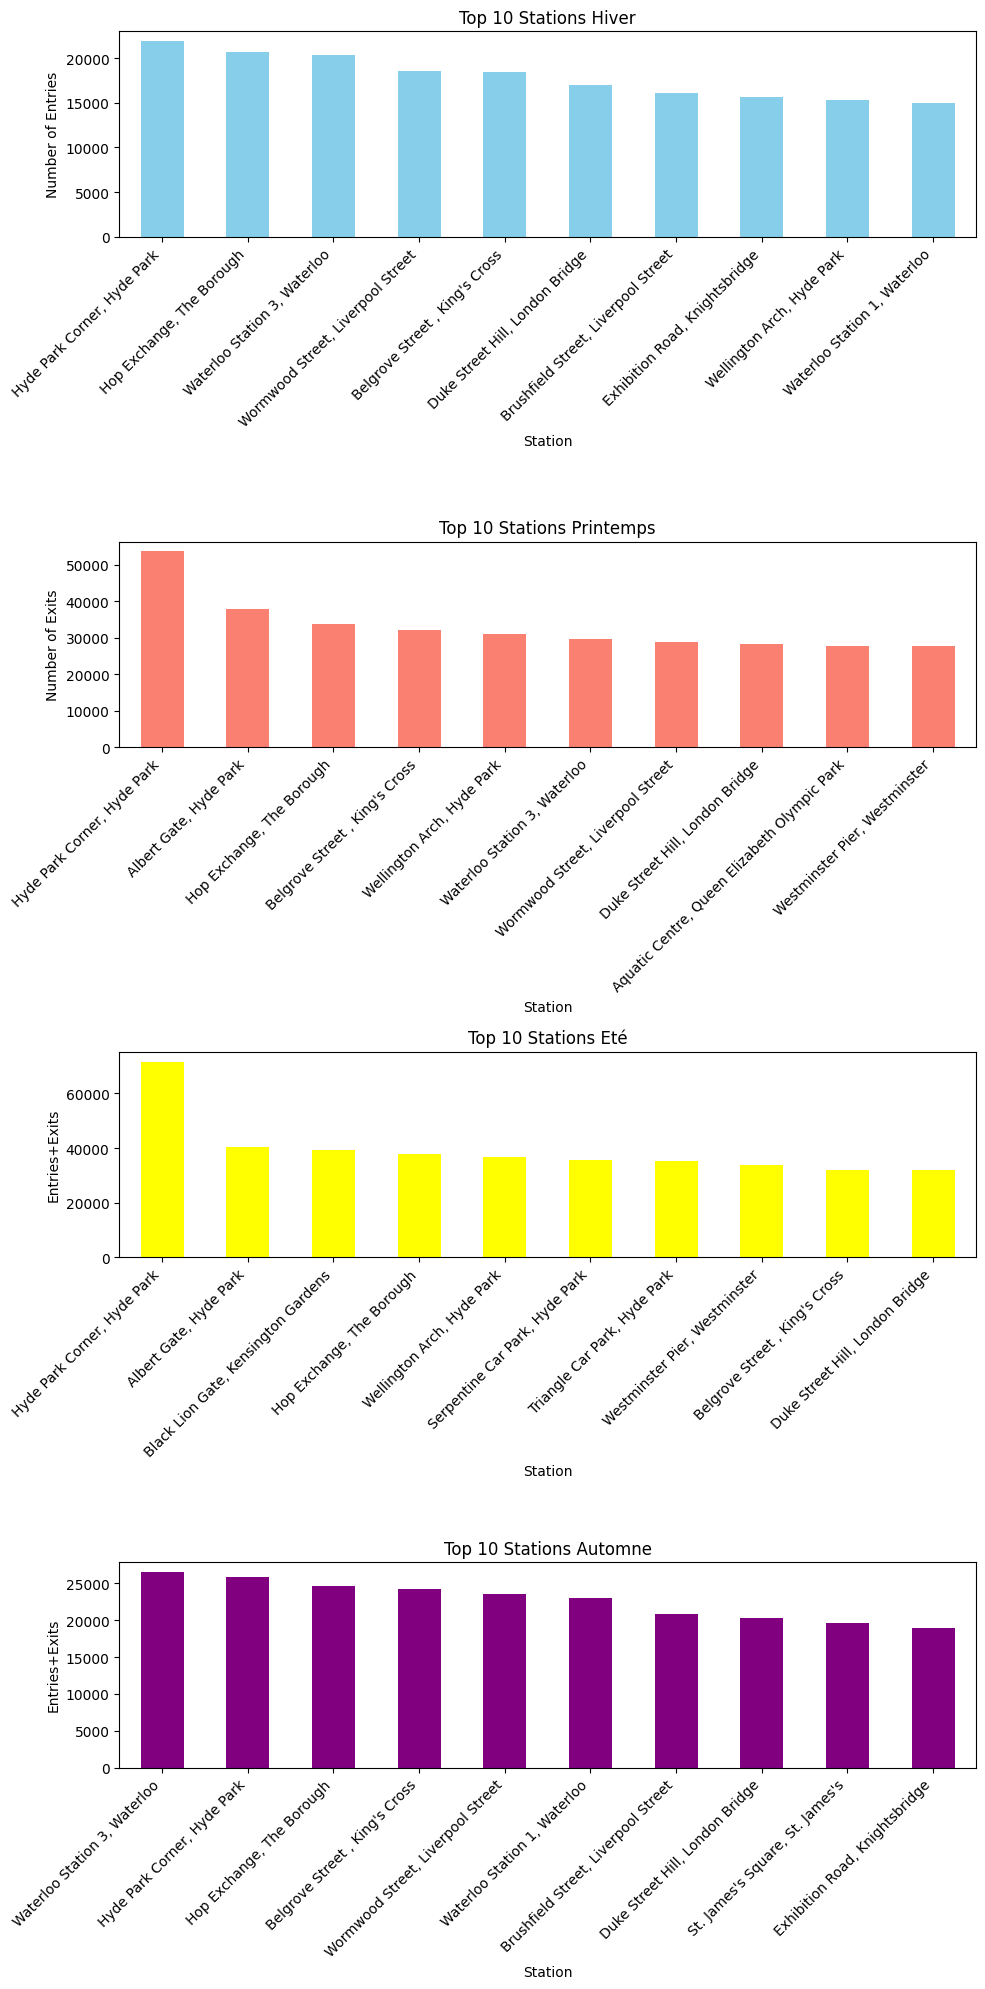

In [64]:
import matplotlib.pyplot as plt

# hiver
entries_count = df_hiver_concat['StartStation Name'].value_counts()
exits_count = df_hiver_concat['EndStation Name'].value_counts()

station_traffic = entries_count.add(exits_count, fill_value=0).sort_values(ascending=False)
top_stations = station_traffic.head(10)

# Printemps
entries_count2 = df_printemps_concat['StartStation Name'].value_counts()
exits_count2 = df_printemps_concat['EndStation Name'].value_counts()

station_traffic2 = entries_count2.add(exits_count2, fill_value=0).sort_values(ascending=False)
top_stations2 = station_traffic2.head(10)

# Eté
entries_count3 = df_ete_concat['StartStation Name'].value_counts()
exits_count3 = df_ete_concat['EndStation Name'].value_counts()

station_traffic3 = entries_count3.add(exits_count3, fill_value=0).sort_values(ascending=False)
top_stations3 = station_traffic3.head(10)


# Automne
entries_count4 = df_automne_concat['StartStation Name'].value_counts()
exits_count4 = df_automne_concat['EndStation Name'].value_counts()

station_traffic4 = entries_count4.add(exits_count4, fill_value=0).sort_values(ascending=False)
top_stations4 = station_traffic4.head(10)


# Créer une figure et des axes pour les subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))

# Plotting des 10 stations avec le plus grand nombre d'entrées
top_stations.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Stations Hiver')
ax1.set_xlabel('Station')
ax1.set_ylabel('Number of Entries')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plotting des 10 stations avec le plus grand nombre de sorties
top_stations2.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Top 10 Stations Printemps')
ax2.set_xlabel('Station')
ax2.set_ylabel('Number of Exits')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


# Plotting des 10 stations avec le plus grand nombre d'entrées et de sorties
top_stations3.plot(kind='bar', color='yellow', ax=ax3)
ax3.set_title('Top 10 Stations Eté')
ax3.set_xlabel('Station')
ax3.set_ylabel('Entries+Exits')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Plotting des 10 stations avec le plus grand nombre d'entrées et de sorties
top_stations4.plot(kind='bar', color='purple', ax=ax4)
ax4.set_title('Top 10 Stations Automne')
ax4.set_xlabel('Station')
ax4.set_ylabel('Entries+Exits')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
# Ajuster le layout


plt.tight_layout()


# Afficher les subplots
plt.show()


In [65]:
top_stations

Hyde Park Corner, Hyde Park            21894.0
Hop Exchange, The Borough              20676.0
Waterloo Station 3, Waterloo           20380.0
Wormwood Street, Liverpool Street      18569.0
Belgrove Street , King's Cross         18436.0
Duke Street Hill, London Bridge        16995.0
Brushfield Street, Liverpool Street    16107.0
Exhibition Road, Knightsbridge         15692.0
Wellington Arch, Hyde Park             15263.0
Waterloo Station 1, Waterloo           14958.0
Name: count, dtype: float64

#### 2. Sur toute l'année

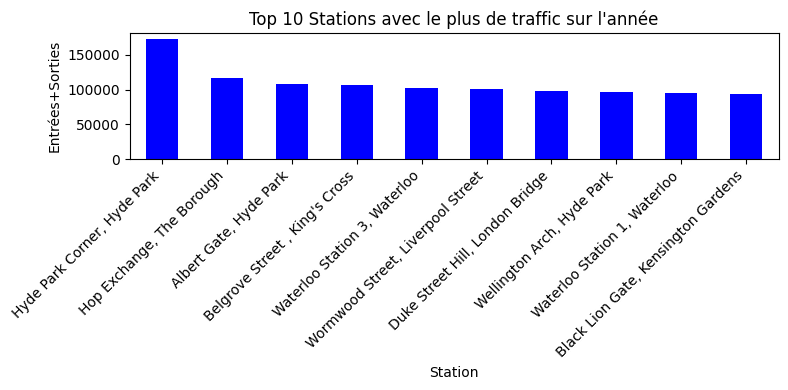

In [66]:
import matplotlib.pyplot as plt
station_traffic_total = station_traffic4.add(station_traffic, fill_value=0)\
                                            .add(station_traffic2, fill_value=0)\
                                            .add(station_traffic3, fill_value=0)\
                                            .sort_values(ascending=False)

# Sélectionner les 10 stations avec le plus grand nombre de cumul d'entrées et sorties
top_stations_total = station_traffic_total.head(10)


plt.figure(figsize=(8, 4))
top_stations_total.plot(kind='bar', color="blue")
plt.title("Top 10 Stations avec le plus de traffic sur l'année")
plt.xlabel("Station")
plt.ylabel("Entrées+Sorties")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A présent recensons pour chaque station le volume de traffic horaire sur l'année

## Création de dataframes pour chaque station

Nous considérerons les 10 stations avec le plus d'activités recensées

In [67]:
top_stations_total

Hyde Park Corner, Hyde Park            173168.0
Hop Exchange, The Borough              117131.0
Albert Gate, Hyde Park                 107671.0
Belgrove Street , King's Cross         106708.0
Waterloo Station 3, Waterloo           103066.0
Wormwood Street, Liverpool Street      100288.0
Duke Street Hill, London Bridge         97351.0
Wellington Arch, Hyde Park              96745.0
Waterloo Station 1, Waterloo            94625.0
Black Lion Gate, Kensington Gardens     93440.0
Name: count, dtype: float64

In [19]:
# Créer une liste pour stocker les DataFrames pour chaque station
traffic_dfs_hiver_concat = []

# Parcourir les 10 stations les plus fréquentées
for station in top_stations_total.index:
    # Filtrer les données pour les trajets qui commencent à la station
    start_station_data = df_hiver_concat[df_hiver_concat['StartStation Name'] == station]
    
    # Filtrer les données pour les trajets qui se terminent à la station
    end_station_data = df_hiver_concat[df_hiver_concat['EndStation Name'] == station]
    
    # Compter le nombre de trajets à chaque jour pour les départs de la station
    start_traffic_dayly = start_station_data['Start Date'].dt.day.value_counts().sort_index()
    
    # Compter le nombre de trajets à chaque jour pour les arrivées à la station
    end_traffic_dayly = end_station_data['End Date'].dt.day.value_counts().sort_index()
    
    # Fusionner les deux séries pour obtenir le trafic total à chaque jour
    total_traffic_dayly = start_traffic_dayly.add(end_traffic_dayly, fill_value=0)
    
    # Convertir la série en DataFrame et renommer la colonne existante
    traffic_df_hiver_concat = total_traffic_dayly.to_frame(name='Traffic')
    traffic_df_hiver_concat.columns = ['Traffic']  # Renommer la colonne existante
    
    # Ajouter une colonne pour le jour
    traffic_df_hiver_concat['Day'] = traffic_df_hiver_concat.index
    
    # Ajouter une colonne pour le nom de la station
    traffic_df_hiver_concat['Station'] = station
    
    # Ajouter le DataFrame de trafic à la liste
    traffic_dfs_hiver_concat.append(traffic_df_hiver_concat)

# Concaténer tous les DataFrames de trafic en un seul
total_traffic_df_hiver_concat = pd.concat(traffic_dfs_hiver_concat, ignore_index=True)

# Afficher les premières lignes du DataFrame combiné
total_traffic_df_hiver_concat.head()


,Traffic,Day,Station
0,1344,1,"Hyde Park Corner, Hyde Park"
1,772,2,"Hyde Park Corner, Hyde Park"
2,841,3,"Hyde Park Corner, Hyde Park"
3,583,4,"Hyde Park Corner, Hyde Park"
4,1014,5,"Hyde Park Corner, Hyde Park"


In [170]:
total_traffic_df_hiver_concat.to_csv("stations_été.csv")

In [171]:
total_traffic_df_hiver_concat[total_traffic_df_hiver_concat["Station"]=="Hyde Park Corner, Hyde Park"]["Traffic"].sum()

49230

In [21]:
df_stations = pd.read_csv("data/london_stations.csv")
df_stations.head()

,station_id,station_name,longitude,latitude
0,1,"River Street, Clerkenwell",-0.109971,51.5292
1,2,"Phillimore Gardens, Kensington",-0.197574,51.4996
2,3,"Christopher Street, Liverpool Street",-0.084606,51.5213
3,4,"St. Chad's Street, King's Cross",-0.120974,51.5301
4,5,"Sedding Street, Sloane Square",-0.156876,51.4931


In [ ]:
T = []
for station in top_stations_total.index:
    # Recherche de l'identifiant de la station correspondant au nom de la station
    station_id = df_stations.loc[df_stations["station_name"] == station, "station_id"].iloc[0]
    T.append(station_id)
T


In [193]:
station_traffic_total.head()

Hyde Park Corner, Hyde Park       298087.0
Hop Exchange, The Borough         205616.0
Belgrove Street , King's Cross    185502.0
Albert Gate, Hyde Park            182472.0
Waterloo Station 3, Waterloo      180986.0
Name: count, dtype: float64

In [194]:
Station_value = "Waterloo Station 3, Waterloo"
element = station_traffic_total.loc[Station_value]
print(element)


180986.0


### Analyse du traffic de vélos partage

In [74]:
df_automne_concat.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id                object
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id              object
StartStation Name            object
dtype: object

In [3]:
import pandas as pd
import urllib

# Lire la liste des noms de tous les fichiers à partir d'un fichier CSV séparé
with open('urls_bike.csv', 'r') as f:
    csv_list = f.read().splitlines()

# Filtrer les fichiers pour ne lire que ceux de l'année 2022
csv_list_2022 = [file for file in csv_list if '2022' in file]

# Télécharger tous les fichiers CSV des trajets à vélo et les ajouter à un seul ensemble de données
website = 'http://cycling.data.tfl.gov.uk/usage-stats/'
url_list_2022 = [website + urllib.parse.quote(x) for x in csv_list_2022]
dfs_2022 = (pd.read_csv(url) for url in url_list_2022)
all_data_2022 = pd.concat(dfs_2022, ignore_index=True)

print(all_data_2022.shape)
all_data_2022.head()


FileNotFoundError: [Errno 2] No such file or directory: 'urls_bike.csv'

In [6]:
dfs_final = pd.read_csv("data\Data_final.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\234864275.py:1: SyntaxWarning: invalid escape sequence '\D'
  dfs_final = pd.read_csv("data\Data_final.csv")
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\234864275.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_final = pd.read_csv("data\Data_final.csv")


In [31]:
# Concatenation de toutes les données par période

df_final = [df_automne_concat, df_ete_concat, df_hiver_concat, df_printemps_concat]

dfs_final = pd.concat(df_final, ignore_index=True)
dfs_final.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,124932816,780,20506,2022-09-06 15:50:00,92,"Borough Road, Elephant & Castle",2022-09-06 15:37:00,195,"Milroy Walk, South Bank"
1,124912148,900,16468,2022-09-05 21:44:00,92,"Borough Road, Elephant & Castle",2022-09-05 21:29:00,377,"Waterloo Bridge, South Bank"
2,124895081,960,20584,2022-09-05 15:33:00,92,"Borough Road, Elephant & Castle",2022-09-05 15:17:00,427,"Cheapside, Bank"
3,124861431,420,21518,2022-09-04 15:24:00,449,"Shadwell Station, Shadwell",2022-09-04 15:17:00,46,"Nesham Street, Wapping"
4,124903575,240,20555,2022-09-05 18:13:00,92,"Borough Road, Elephant & Castle",2022-09-05 18:09:00,80,"Webber Street , Southwark"


#### Ajout des jours de la semaine

In [32]:
# Convertir les colonnes de dates en objets datetime
# Remplacer les dates au format '%Y-%m-%d %H:%M' par '%d/%m/%Y %H:%M'
# Remplacer le format '%Y-%m-%d %H:%M' par '%d/%m/%Y %H:%M' dans les colonnes 'Start Date' et 'End Date'



# Convertir les colonnes "Start Date" et "End Date" en objets datetime
dfs_final['Start Date'] = pd.to_datetime(dfs_final['Start Date'], format='%d/%m/%Y %H:%M')
dfs_final['End Date'] = pd.to_datetime(dfs_final['End Date'], format='%d/%m/%Y %H:%M')




In [33]:
dfs_final.dtypes

Rental Id                     int64
Duration                      int64
Bike Id                       int64
End Date             datetime64[ns]
EndStation Id                object
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id              object
StartStation Name            object
dtype: object

In [34]:
# Ajouter une nouvelle colonne pour le jour de la semaine
dfs_final["End Day of Week"] = dfs_final["End Date"].dt.dayofweek
dfs_final["Start Day of Week"] = dfs_final["Start Date"].dt.dayofweek


dfs_final['Start Hour'] = dfs_final['Start Date'].dt.hour

# Extraire le jour de la semaine et l'heure de chaque date
dfs_final['Month'] = dfs_final['Start Date'].dt.month

dfs_final

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,End Day of Week,Start Day of Week,Start Hour,Month
0,124932816,780,20506,2022-09-06 15:50:00,92,"Borough Road, Elephant & Castle",2022-09-06 15:37:00,195,"Milroy Walk, South Bank",1,1,15,9
1,124912148,900,16468,2022-09-05 21:44:00,92,"Borough Road, Elephant & Castle",2022-09-05 21:29:00,377,"Waterloo Bridge, South Bank",0,0,21,9
2,124895081,960,20584,2022-09-05 15:33:00,92,"Borough Road, Elephant & Castle",2022-09-05 15:17:00,427,"Cheapside, Bank",0,0,15,9
3,124861431,420,21518,2022-09-04 15:24:00,449,"Shadwell Station, Shadwell",2022-09-04 15:17:00,46,"Nesham Street, Wapping",6,6,15,9
4,124903575,240,20555,2022-09-05 18:13:00,92,"Borough Road, Elephant & Castle",2022-09-05 18:09:00,80,"Webber Street , Southwark",0,0,18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11485359,120636147,840,19322,2022-05-27 15:04:00,191,"Hyde Park Corner, Hyde Park",2022-05-27 14:50:00,386,"Moor Street, Soho",4,4,14,5
11485360,120654627,1140,15405,2022-05-27 20:19:00,828,"Normandy Road, Stockwell",2022-05-27 20:00:00,386,"Moor Street, Soho",4,4,20,5
11485361,120614409,1260,18168,2022-05-26 22:20:00,340,"Bank of England Museum, Bank",2022-05-26 21:59:00,386,"Moor Street, Soho",3,3,21,5
11485362,120793362,720,19502,2022-05-31 17:28:00,45,"Boston Place, Marylebone",2022-05-31 17:16:00,386,"Moor Street, Soho",1,1,17,5


In [84]:
dfs_final.to_csv("data/Data_final.csv")

### Données journalières, horaires et mensuelles

In [35]:

import seaborn as sns
import matplotlib.pyplot as plt

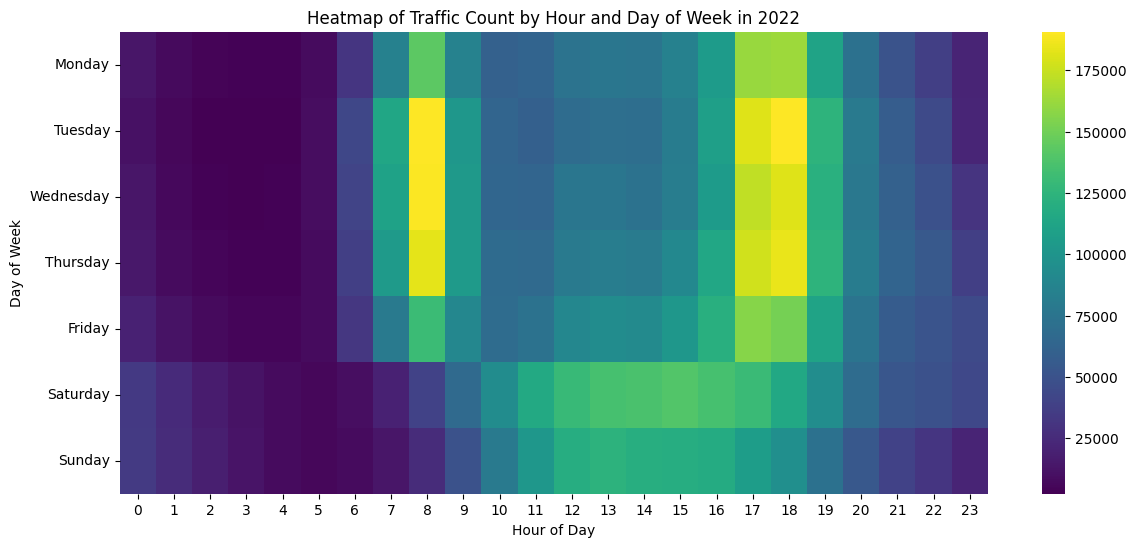

In [36]:


# Supposons que vous ayez déjà une DataFrame avec les colonnes "Start Date" et "End Date" au format datetime
# Si elles ne sont pas encore au format datetime, assurez-vous de les convertir comme mentionné précédemment

# Regrouper les données par jour de la semaine et par heure, en comptant le nombre de locations à chaque heure pour chaque jour
heatmap_data = dfs_final.groupby(['Start Day of Week', 'Start Hour']).size().unstack()

# Réordonner les jours de la semaine pour qu'ils apparaissent dans l'ordre
heatmap_data = heatmap_data.reindex(index=[0, 1, 2, 3, 4, 5, 6])
# Définir les noms des jours de la semaine dans l'ordre approprié
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Créer le heatmap avec les noms des jours sur l'axe Y
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, yticklabels=day_names)
plt.title('Heatmap of Traffic Count by Hour and Day of Week in 2022')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [37]:
# Calculer le nombre de jours de semaine et de week-end pour chaque mois
dfs_final['Weekday'] = dfs_final['Start Date'].dt.dayofweek < 5  # 0-4: weekday, 5-6: weekend

In [38]:
# Calculer le nombre de mois dans la colonne des dates
num_months = dfs_final['Start Date'].dt.month.nunique()
print("Nombre de mois:", num_months)


Nombre de mois: 12


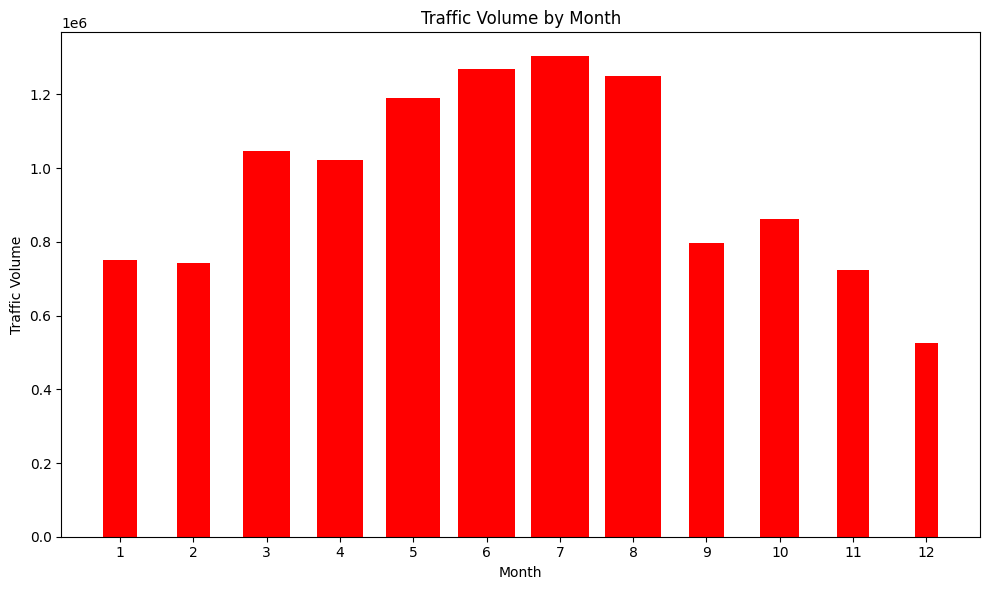

In [39]:

month_weekday_count = dfs_final.groupby(dfs_final['Start Date'].dt.month)['Weekday'].value_counts().unstack(fill_value=0)

# Calculer la largeur de l'histogramme en fonction du mois
month_traffic = month_weekday_count.sum(axis=1)
month_width = month_traffic / month_traffic.max() * 0.8

# Créer l'histogramme des mois avec la taille proportionnelle au trafic
fig, ax = plt.subplots(figsize=(10, 6))

# Plot taille du trafic par mois
ax.bar(month_traffic.index, month_traffic.values, color='red', width=month_width)

# Ajouter des légendes et des titres
ax.set_title('Traffic Volume by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Traffic Volume')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(range(1, 13))
plt.tight_layout()
plt.show()

In [40]:
dfs_finalcopy = dfs_final.copy()

In [105]:
pip install bs4

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/147.9 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 143.4/147.9 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 143.4/147.9 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- 147.9/147.9 kB 976.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
    --------------------------------------- 0.1/3.8 MB 1.3 MB/s eta 0:00:03
   - -------------------------------------- 0.2/3.8 MB 1.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/3.8 MB 2.6 MB/s eta 0:00:02
   ------ --------------------------------- 0.6/3.8 MB 3.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.8 MB 3.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 3.5 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.8 MB 3.7 MB/s eta 0:00:01
   -------------- ------------------------- 1.4/3.8 MB 3.8 MB/s eta 0:00:01
   ----------------- ---------------------- 1.6/3.8 MB 4.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.9/3.8 MB 4.0 MB/s eta 0:00:01
   ---------------------- ----------------- 2.1/3.8 MB 4.1 MB/s eta 0:00:01
   --------------

In [41]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as soup

def london_weather(date):
    """Function to webscrape one day from freemeteo.bg at London station.
    Input: 'year-month-day' -- 2019-01-01
    Output: pandas dataframe
    """

    url = f"https://freemeteo.bg/weather/london/history/daily-history/?gid=2643743&station=1618&date={date}&language=english&country=united-kingdom"
    res = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup1 = soup(res.text, "html.parser")

    columns = ['datetime', 't1', 't2', 'wind_dir', 'hum', 'dew', 'pressure', 'icon', 'other']
    df1 = pd.DataFrame(columns=columns)

    for row in soup1.findAll("tr"):
        cells = row.findAll("td")
        if len(cells) == 10:
            time = cells[0].find(text=True)
            t1 = cells[1].find(text=True)
            t2 = cells[2].find(text=True)
            wind_dir = cells[3].text
            wind_gust = cells[4].find(text=True)
            hum = cells[5].find(text=True)
            dew = cells[6].find(text=True)
            pressure = cells[7].find(text=True)
            icon = cells[8].span.attrs['data-icon']
            date_time = f'{date}T{time}'
            other = cells[9].find('span', "details").text

            row_data = [date_time, t1, t2, wind_dir, hum, dew, pressure, icon, other]
            row_df1 = pd.DataFrame([row_data], columns=columns)
            df1 = pd.concat([df1, row_df1], ignore_index=True)

    df1['datetime'] = pd.to_datetime(df1['datetime'])
    return df1


In [42]:
# Fonction pour récupérer les données météorologiques et les ajouter au DataFrame
def add_weather_data(row):
    date = row['Start Date'].strftime('%Y-%m-%d')
    weather_data = london_weather(date)
    if not weather_data.empty:
        row['Temperature (°C) t1'] = weather_data.iloc[0]['t1']
        row['Temperature (°C) t2'] = weather_data.iloc[0]['t2']
        row['Humidity (%)'] = weather_data.iloc[0]['hum']
    return row

# Appliquer la fonction à chaque ligne du DataFrame
dfs_finalcopy = dfs_finalcopy.apply(add_weather_data, axis=1)


C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\1176370729.py:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  time = cells[0].find(text=True)
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\1176370729.py:22: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  t1 = cells[1].find(text=True)
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\1176370729.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  t2 = cells[2].find(text=True)
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\1176370729.py:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  wind_gust = cells[4].find(text=True)
C:\Users\issiaka.kanazoe\AppData\Local\Temp\ipykernel_5272\1176370729.py:26: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. 

In [1]:
dfs_finalcopy.head()

NameError: name 'dfs_finalcopy' is not defined

In [13]:
pip install hvplot

Defaulting to user installation because normal site-packages is not writeable
  Using cached hvplot-0.9.2-py2.py3-none-any.whl.metadata (20 kB)
  Using cached holoviews-1.18.3-py2.py3-none-any.whl.metadata (21 kB)
Using cached hvplot-0.9.2-py2.py3-none-any.whl (1.8 MB)
Using cached holoviews-1.18.3-py2.py3-none-any.whl (4.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -r requirements.txt 

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached geopandas-0.14.3-py3-none-any.whl.metadata (1.5 kB)
  Using cached plotly-5.21.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached fiona-1.9.6-cp312-cp312-win_amd64.whl.metadata (51 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Using cached geopandas-0.14.3-py3-none-any.whl (1.1 MB)
Using cached plotly-5.21.0-py3-none-any.whl (15.7 MB)
Using cached fiona-1.9.6-cp312-cp312-win_amd64.whl (22.9 MB)
Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Note: you may ne

In [11]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 960.0 kB/s eta 0:00:01
   ------------------------------------ --- 92.2/100.0 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 718.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
import hvplot
from shapely.geometry import Point
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Preprocessing 🛠️

In this first section we will work on preprocessing. This involves cleaning ✨, transforming 🔀, and organizing 📂 our data to make it more suitable for analysis.

Don't worry, if you're not into that kind of stuff, no worries! You can collapse this section with a click of a button 🤏 and move on to the next. But if you stick around, you might learn some cool things!

So if you're ready for some data magic 🔮, feel free to expand this section and learn more about the specifics of preprocessing in my project!

### Loading TFL Station ridership data

#### Loading bikesharing travel data from the entire 2016 year

In [5]:
df1 = pd.read_csv("donnees_concatenees1.csv")

df1.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,50754225,240.0,11834,10/01/2016 00:04,383.0,"Frith Street, Soho",10/01/2016 00:00,18,"Drury Lane, Covent Garden",NaN,NaN,NaN
1,50754226,300.0,9648,10/01/2016 00:05,719.0,"Victoria Park Road, Hackney Central",10/01/2016 00:00,479,"Pott Street, Bethnal Green",NaN,NaN,NaN
2,50754227,1200.0,10689,10/01/2016 00:20,272.0,"Baylis Road, Waterloo",10/01/2016 00:00,425,"Harrington Square 2, Camden Town",NaN,NaN,NaN
3,50754228,780.0,8593,10/01/2016 00:14,471.0,"Hewison Street, Old Ford",10/01/2016 00:01,487,"Canton Street, Poplar",NaN,NaN,NaN
4,50754229,600.0,8619,10/01/2016 00:11,399.0,"Brick Lane Market, Shoreditch",10/01/2016 00:01,501,"Cephas Street, Bethnal Green",NaN,NaN,NaN


In [6]:
df2 = pd.read_csv("donnees_concatenees2.csv")

df2.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,EndStation Logical Terminal,endStationPriority_id,StartStation Logical Terminal
0,55346126,1260.0,5498.0,29/06/2016 00:21,549.0,"Gaywood Street, Elephant & Castle",29/06/2016 00:00,252.0,"Jubilee Gardens, South Bank",NaN,NaN,NaN,NaN,NaN,NaN
1,55346125,1320.0,6367.0,29/06/2016 00:22,549.0,"Gaywood Street, Elephant & Castle",29/06/2016 00:00,252.0,"Jubilee Gardens, South Bank",NaN,NaN,NaN,NaN,NaN,NaN
2,55346123,180.0,6163.0,29/06/2016 00:03,322.0,"Palissy Street, Shoreditch",29/06/2016 00:00,399.0,"Brick Lane Market, Shoreditch",NaN,NaN,NaN,NaN,NaN,NaN
3,55346124,180.0,13713.0,29/06/2016 00:03,126.0,"Museum of London, Barbican",29/06/2016 00:00,275.0,"Barbican Centre, Barbican",NaN,NaN,NaN,NaN,NaN,NaN
4,55346127,600.0,1911.0,29/06/2016 00:11,537.0,"Old Montague Street, Whitechapel",29/06/2016 00:01,491.0,"Queen Mary's, Mile End",NaN,NaN,NaN,NaN,NaN,NaN


### Nombre de stations

In [7]:

# Compter les éléments uniques dans chaque colonne
elements_uniques_colonne1 = df1['StartStation Id'].nunique()
elements_uniques_colonne2 = df2['StartStation Id'].nunique()

# Afficher le nombre d'éléments uniques dans chaque colonne
print("Nombre d'éléments uniques dans la colonne 1 :", elements_uniques_colonne1)
print("Nombre d'éléments uniques dans la colonne 2 :", elements_uniques_colonne2)


Nombre d'éléments uniques dans la colonne 1 : 782
Nombre d'éléments uniques dans la colonne 2 : 788


In [9]:

# Compter les éléments uniques dans chaque colonne
elements_uniques_colonne1 = df1['EndStation Id'].nunique()
elements_uniques_colonne2 = df2['EndStation Id'].nunique()

# Afficher le nombre d'éléments uniques dans chaque colonne
print("Nombre d'éléments uniques dans la colonne 1 :", elements_uniques_colonne1)
print("Nombre d'éléments uniques dans la colonne 2 :", elements_uniques_colonne2)

print ("Le nombre total  de stations est : ", max(elements_uniques_colonne1, elements_uniques_colonne2))

Nombre d'éléments uniques dans la colonne 1 : 783
Nombre d'éléments uniques dans la colonne 2 : 788
Le nombre total  de stations est :  788


Résultat : Nous constatons que le nombre total de stations recensées dnns l'année 2016 est de 788

### Nettoyage des données

#### Elimination des colonnes inutiles

In [10]:
# Supprimer les colonnes inutiles (Unnamed: 9, Unnamed: 10, Unnamed: 11)
df1 = df1.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
df2 = df2.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

#### Conversion des colonnes de date au format datetime

In [ ]:

# Convertir les colonnes de dates au format datetime
df1['End Date'] = pd.to_datetime(df1['End Date'])
df1['Start Date'] = pd.to_datetime(df1['Start Date'])


# Convertir les colonnes de dates au format datetime
df2['End Date'] = pd.to_datetime(df2['End Date'])
df2['Start Date'] = pd.to_datetime(df2['Start Date'])

#### Vérification des durées de location nulle ou négative

In [12]:
df1 = df1[df1['Duration'] > 0]
df2 = df2[df2['Duration'] > 0]

In [13]:
# Afficher les premières lignes pour vérification
df1.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,50754225,240.0,11834,10/01/2016 00:04,383.0,"Frith Street, Soho",10/01/2016 00:00,18,"Drury Lane, Covent Garden"
1,50754226,300.0,9648,10/01/2016 00:05,719.0,"Victoria Park Road, Hackney Central",10/01/2016 00:00,479,"Pott Street, Bethnal Green"
2,50754227,1200.0,10689,10/01/2016 00:20,272.0,"Baylis Road, Waterloo",10/01/2016 00:00,425,"Harrington Square 2, Camden Town"
3,50754228,780.0,8593,10/01/2016 00:14,471.0,"Hewison Street, Old Ford",10/01/2016 00:01,487,"Canton Street, Poplar"
4,50754229,600.0,8619,10/01/2016 00:11,399.0,"Brick Lane Market, Shoreditch",10/01/2016 00:01,501,"Cephas Street, Bethnal Green"


In [17]:
df2 = df2.drop(columns= ['EndStation Logical Terminal', 'endStationPriority_id', "StartStation Logical Terminal"])
df2.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,55346126,1260.0,5498.0,29/06/2016 00:21,549.0,"Gaywood Street, Elephant & Castle",29/06/2016 00:00,252.0,"Jubilee Gardens, South Bank"
1,55346125,1320.0,6367.0,29/06/2016 00:22,549.0,"Gaywood Street, Elephant & Castle",29/06/2016 00:00,252.0,"Jubilee Gardens, South Bank"
2,55346123,180.0,6163.0,29/06/2016 00:03,322.0,"Palissy Street, Shoreditch",29/06/2016 00:00,399.0,"Brick Lane Market, Shoreditch"
3,55346124,180.0,13713.0,29/06/2016 00:03,126.0,"Museum of London, Barbican",29/06/2016 00:00,275.0,"Barbican Centre, Barbican"
4,55346127,600.0,1911.0,29/06/2016 00:11,537.0,"Old Montague Street, Whitechapel",29/06/2016 00:01,491.0,"Queen Mary's, Mile End"


#### Valeurs manquantes 

In [ ]:
plt.figure(figsize=(16,6))
df1.isnull().sum()
df2.isnull().sum()

sns.heatmap(df1.isnull(),cmap="viridis")
sns.heatmap(df2.isnull(),cmap="viridis")

### Extraction des données pour chaque station dans la première moitié de l'année

In [44]:
# Compter le nombre d'entrées pour chaque station
entrees_par_station = df1['StartStation Name'].value_counts().reset_index()
entrees_par_station.columns = ['Station Name', 'Nombre d\'entrées']

# Compter le nombre de sorties pour chaque station
sorties_par_station = df1['EndStation Name'].value_counts().reset_index()
sorties_par_station.columns = ['Station Name', 'Nombre de sorties']

# Fusionner les deux DataFrames sur la colonne 'Station Name'
donnees_par_station = entrees_par_station.merge(sorties_par_station, on='Station Name', how='outer').fillna(0)

# Afficher les premières lignes pour vérification
donnees_par_station.head()

,Station Name,Nombre d'entrées,Nombre de sorties
0,"Abbey Orchard Street, Westminster",6979.0,8644
1,"Abbotsbury Road, Holland Park",1402.0,1313
2,"Aberdeen Place, St. John's Wood",3429.0,2591
3,"Aberfeldy Street, Poplar",601.0,583
4,"Abingdon Green, Westminster",7946.0,9696


In [30]:
donnees_par_station.count()

Station Name         790
Nombre d'entrées     790
Nombre de sorties    790
dtype: int64

In [31]:
# Vérifier s'il y a des valeurs nulles dans le DataFrame donnees_par_station
valeurs_nulles = donnees_par_station.isnull().sum()


# Afficher les valeurs nulles par colonne
print("Valeurs nulles par colonne :\n", valeurs_nulles)


Valeurs nulles par colonne :
 Station Name         0
Nombre d'entrées     0
Nombre de sorties    0
dtype: int64


In [33]:
# Vérifier s'il y a des valeurs répétées dans le DataFrame donnees_par_station
sont_rep = donnees_par_station.duplicated().any()
sont_rep

False

### Extraction des données dans la seconde moitié de l'année

In [45]:
# Compter le nombre d'entrées pour chaque station
entrees2_par_station = df2['StartStation Name'].value_counts().reset_index()
entrees2_par_station.columns = ['Station Name', 'Nombre d\'entrées']

# Compter le nombre de sorties pour chaque station
sorties2_par_station = df2['EndStation Name'].value_counts().reset_index()
sorties2_par_station.columns = ['Station Name', 'Nombre de sorties']

# Fusionner les deux DataFrames sur la colonne 'Station Name'
donnees2_par_station = entrees_par_station.merge(sorties2_par_station, on='Station Name', how='outer').fillna(0)

# Afficher les premières lignes pour vérification
donnees2_par_station.head()

,Station Name,Nombre d'entrées,Nombre de sorties
0,"Abbey Orchard Street, Westminster",6979.0,10605.0
1,"Abbotsbury Road, Holland Park",1402.0,2409.0
2,"Aberdeen Place, St. John's Wood",3429.0,3523.0
3,"Aberfeldy Street, Poplar",601.0,1068.0
4,"Abingdon Green, Westminster",7946.0,14103.0


In [53]:
donnees2_par_station.count()

Station Name         805
Nombre d'entrées     805
Nombre de sorties    805
dtype: int64

In [38]:
donnees2_par_station.isnull().sum()

Station Name         0
Nombre d'entrées     0
Nombre de sorties    0
dtype: int64

In [ ]:
T = []
for i in donnees_par_station["Station Name"]:
    if i not in donnees2_par_station["Station Name"]:
        print(i)
        T.append(i)

len(T)

In [52]:
# Obtenez les ensembles distincts de valeurs dans la colonne "Station Name" pour chaque DataFrame
set1 = set(donnees_par_station["Station Name"])
set2 = set(donnees2_par_station["Station Name"])

# Trouvez les éléments dans la colonne "Station Name" par lesquels ils diffèrent
elements_differents = set1.symmetric_difference(set2)

# Afficher les éléments qui diffèrent
print("Les éléments dans la colonne 'Station Name' par lesquels les DataFrames diffèrent :")
for element in elements_differents:
    print(element)


Les éléments dans la colonne 'Station Name' par lesquels les DataFrames diffèrent :
Riverlight South, Nine Elms
New Spring Gardens Walk, Vauxhall
Lincoln's Inn Fields, Holborn
The Vale, Chelsea
Here East North, Queen Elizabeth Olympic Park
Westferry Circus, Canary Wharf
Belvedere Road 2, South Bank
Victory place, Walworth
Bevington Road, North Kensington
Clapham Common North Side, Clapham Common
Nantes Close, Wandsworth
Fawcett Close, Battersea
Ossulston Street, Somers Town
Handyside Street, King's Cross
Belvedere Road 1, South Bank
